In [1]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SPY_df = pd.read_csv("SPY.csv")
SPY_df['True_Label']=SPY_df["Return"].apply(lambda x : '+' if x >= 0 else '-')
SPY_df["delta_diff"] = SPY_df.Close - SPY_df.Open
SPY_df = SPY_df[SPY_df.Year > 2014]
SPY_df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Label,delta_diff
252,2015-01-02,2015,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2015-00,206.38,206.88,204.18,205.43,121465900.0,179.78,-0.000535,179.193571,177.6540,-,-0.95
253,2015-01-05,2015,1,5,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,204.17,204.37,201.35,201.72,169632600.0,176.54,-0.018060,179.314286,177.8306,-,-2.45
254,2015-01-06,2015,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,202.09,202.72,198.86,199.82,209151400.0,174.87,-0.009419,179.402143,177.9348,-,-2.27
255,2015-01-07,2015,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,201.42,202.72,200.88,202.31,125346700.0,177.05,0.012461,179.745000,178.0566,+,0.89
256,2015-01-08,2015,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,204.01,206.16,203.99,205.90,147217800.0,180.20,0.017745,180.071429,178.2460,+,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,321.47,321.52,320.90,321.23,20270000.0,310.23,0.000031,305.515000,297.8884,+,-0.24
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,321.65,322.95,321.64,322.94,30911200.0,311.88,0.005323,306.373571,298.3814,+,1.29
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,323.74,323.80,322.28,322.86,42528800.0,311.80,-0.000248,307.030714,298.8820,-,-0.88
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,322.95,323.10,320.55,321.08,49729100.0,310.08,-0.005513,307.632857,299.3312,-,-1.87


### "buy-and-hold" strategies

In [3]:
#For buy and hold, you buy on the first day of 2018 and sell on the last day of 2019
SPY_BnH = SPY_df[SPY_df.Year >= 2018]
SPY_BnH['invest_bnh'] = (SPY_BnH['Return']+1).cumprod()-1

D:\TEMP/ipykernel_14688/3087456025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_BnH['invest_bnh'] = (SPY_BnH['Return']+1).cumprod()-1


<Figure size 432x288 with 0 Axes>

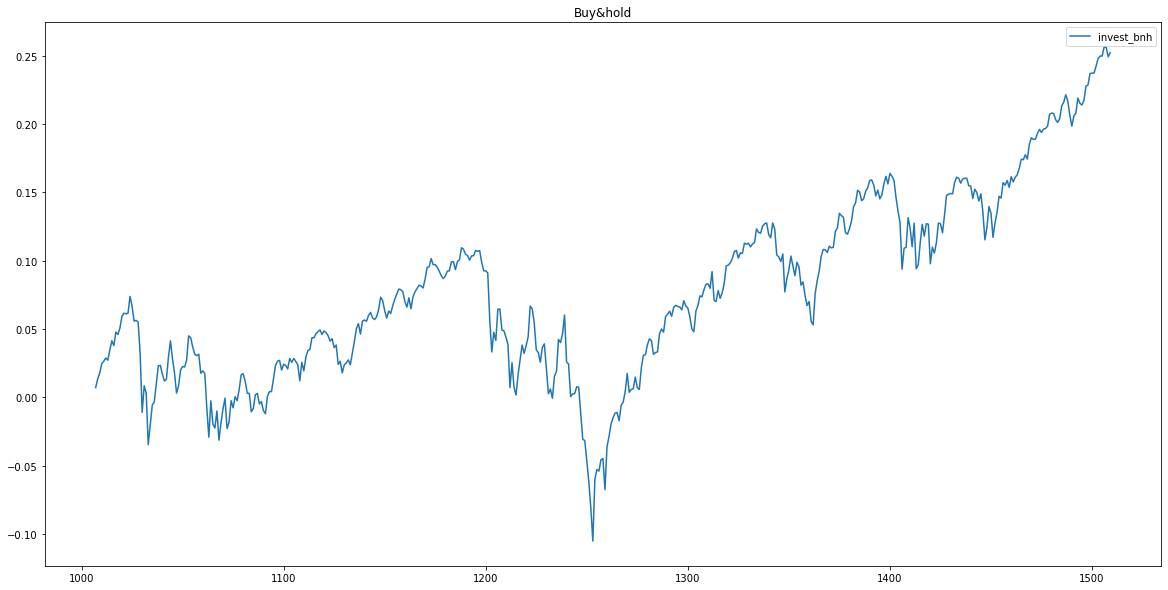

In [4]:
fig = plt.figure()
ax1 = SPY_BnH[['invest_bnh']].plot(kind='line', title ="Buy&hold",figsize=(20,10))
plt.show()

### True Label

In [5]:
SPY_grouped = SPY_df.groupby(['Year', 'Week_Number'])['Return'].agg([np.sum])
SPY_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
SPY_grouped['Year_Week_Number'] = SPY_grouped['Year'].astype(str) + SPY_grouped['Week_Number'].astype(str)
SPY_grouped.rename(columns={'sum': 'Weekly_Return'}, inplace=True)
SPY_grouped['Label']=SPY_grouped["Weekly_Return"].apply(lambda x : '1' if x >= 0 else '0')
SPY_grouped.dropna(inplace=True)
SPY_grouped

,Year,Week_Number,Weekly_Return,Year_Week_Number,Label
0,2015,0,-0.000535,20150,0
1,2015,1,-0.005286,20151,0
2,2015,2,-0.012730,20152,0
3,2015,3,0.016569,20153,1
4,2015,4,-0.027004,20154,0
...,...,...,...,...,...
258,2019,48,0.001901,201948,1
259,2019,49,0.007798,201949,1
260,2019,50,0.015635,201950,1
261,2019,51,0.006634,201951,1


In [6]:
SPY_df['invest_label'] = SPY_df.apply(lambda x: x['Close'] / x['Open'], axis=1) * 100 
SPY_label = SPY_df.groupby(['Year', 'Week_Number'])['invest_label'].agg([np.mean])
SPY_label.reset_index(['Year', 'Week_Number'], inplace=True)
SPY_label.rename(columns={'mean': 'invest_label'}, inplace=True)
SPY_label = SPY_label.merge(SPY_grouped, on=['Year', 'Week_Number'], how = 'inner')
SPY_label = SPY_label[SPY_label.Year >= 2018]

SPY_label_green = SPY_label[SPY_label.Label == '1']
SPY_label_green

,Year,Week_Number,invest_label,Weekly_Return,Year_Week_Number,Label
157,2018,0,100.348439,0.024361,20180,1
158,2018,1,100.295254,0.016377,20181,1
159,2018,2,99.953166,0.008982,20182,1
160,2018,3,100.263056,0.021867,20183,1
163,2018,6,100.833347,0.043721,20186,1
...,...,...,...,...,...,...
257,2019,47,100.190293,0.010765,201947,1
258,2019,48,99.953995,0.001901,201948,1
259,2019,49,100.170880,0.007798,201949,1
260,2019,50,100.055681,0.015635,201950,1


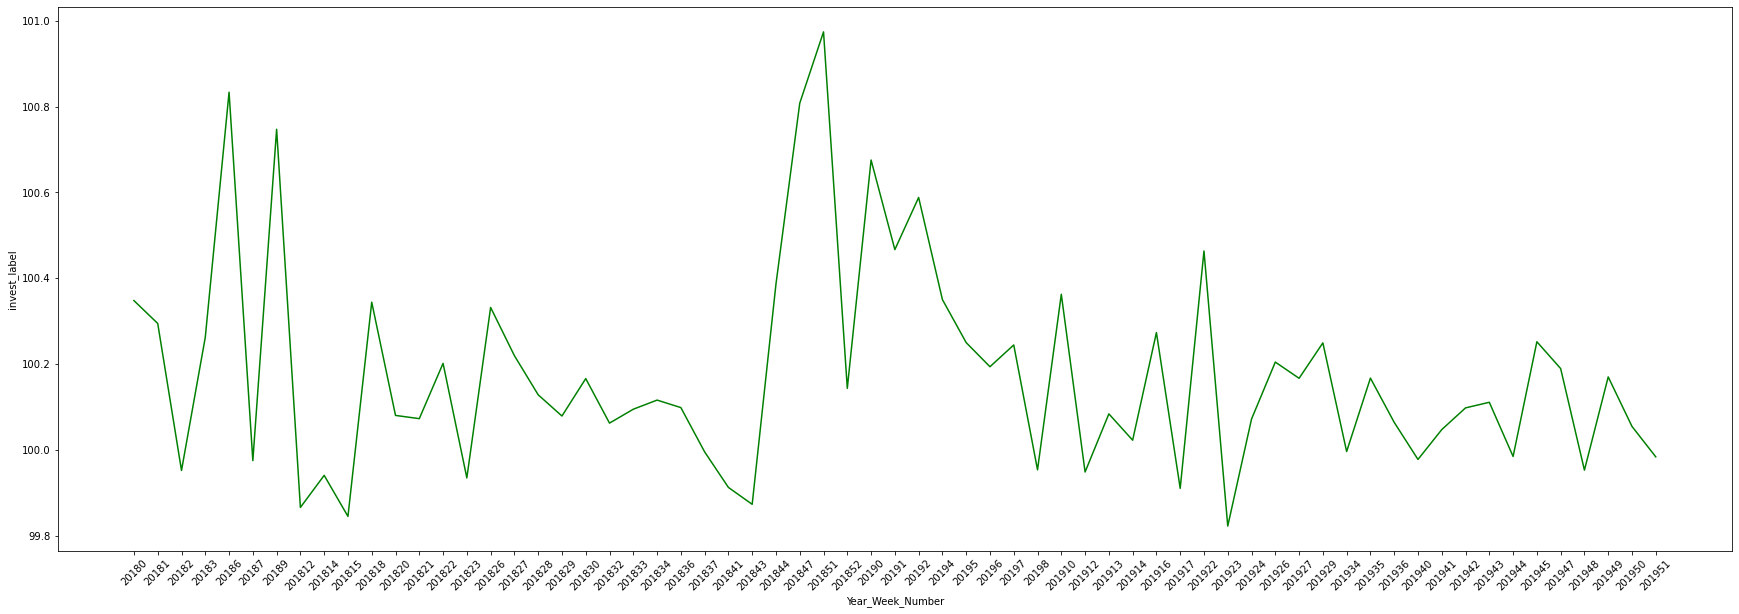

In [7]:
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=SPY_label_green,x='Year_Week_Number', y = "invest_label",color = 'green')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

### knn 

In [8]:
#parameter 1 
#1 find the mean delta difference for each week in each year
#2 subtract the mean from each delta difference in that week
#3 square each of the differences and sum them up
#4 divide the square by the number of days in that week
#5 take the square root
parameter1 = SPY_df.groupby(['Year', 'Week_Number'])['delta_diff'].apply(lambda x: np.sqrt(np.sum(np.square(x - np.mean(x)))/len(x))).to_frame()
parameter1.reset_index(['Year', 'Week_Number'], inplace=True)
parameter1.rename(columns={'delta_diff': 'parameter1'}, inplace=True)
parameter1

,Year,Week_Number,parameter1
0,2015,0,0.000000
1,2015,1,1.832838
2,2015,2,2.126964
3,2015,3,1.238575
4,2015,4,1.941737
...,...,...,...
258,2019,48,1.454936
259,2019,49,1.148484
260,2019,50,0.546531
261,2019,51,0.809784


In [9]:
#parameter2
#the sd of the week in delta difference
parameter2 = SPY_df.groupby(["Year", "Week_Number"]).agg("delta_diff").std().to_frame()
parameter2.reset_index(['Year', 'Week_Number'], inplace=True)
parameter2.rename(columns={'delta_diff': 'parameter2'}, inplace=True)
parameter2

,Year,Week_Number,parameter2
0,2015,0,NaN
1,2015,1,2.049175
2,2015,2,2.378018
3,2015,3,1.430184
4,2015,4,2.170928
...,...,...,...
258,2019,48,1.626668
259,2019,49,1.284044
260,2019,50,0.611040
261,2019,51,0.935058


In [10]:
SPY_knn = parameter2.copy()
SPY_knn['parameter1']=parameter1['parameter1']
SPY_knn = SPY_knn.merge(SPY_grouped, on=['Year', 'Week_Number'], how = 'inner')
SPY_knn.dropna(inplace=True)
SPY_knn

,Year,Week_Number,parameter2,parameter1,Weekly_Return,Year_Week_Number,Label
1,2015,1,2.049175,1.832838,-0.005286,20151,0
2,2015,2,2.378018,2.126964,-0.012730,20152,0
3,2015,3,1.430184,1.238575,0.016569,20153,1
4,2015,4,2.170928,1.941737,-0.027004,20154,0
5,2015,5,1.239738,1.108855,0.030367,20155,1
...,...,...,...,...,...,...,...
258,2019,48,1.626668,1.454936,0.001901,201948,1
259,2019,49,1.284044,1.148484,0.007798,201949,1
260,2019,50,0.611040,0.546531,0.015635,201950,1
261,2019,51,0.935058,0.809784,0.006634,201951,1


In [11]:
from sklearn.neighbors import KNeighborsClassifier
SPY_training = SPY_knn[SPY_knn.Year <= 2017] 
SPY_testing = SPY_knn[SPY_knn.Year >= 2018]

X_train = SPY_training[['parameter1','parameter2']].values
X_test = SPY_testing[['parameter1','parameter2']].values
y_train = SPY_training['Label'].values
y_test = SPY_testing['Label'].values

In [12]:
#p=1
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=1, metric="minkowski")
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)

In [13]:
SPY_knn_pre = SPY_knn.copy()
SPY_knn_pre = SPY_knn_pre[SPY_knn_pre.Year >= 2018]

In [14]:
SPY_knn_pre['pre_label'] = prediction_test
SPY_knn_pre['invest_label'] = SPY_label['invest_label']
SPY_knn_pre_green = SPY_knn_pre[SPY_knn_pre.pre_label == '1']

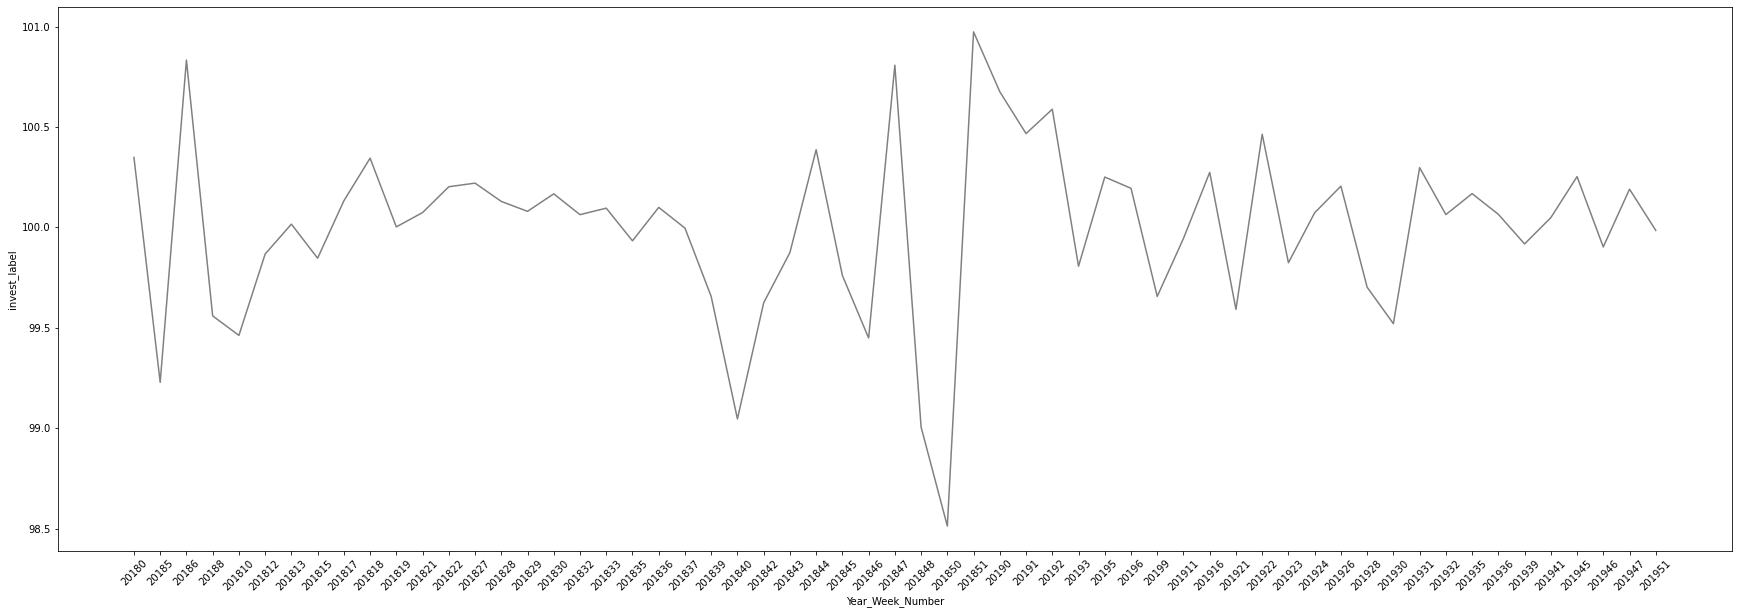

In [15]:
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=SPY_knn_pre_green,x='Year_Week_Number', y = "invest_label",color = 'gray')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [16]:
#p = 1.5
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=1.5, metric="minkowski")
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)

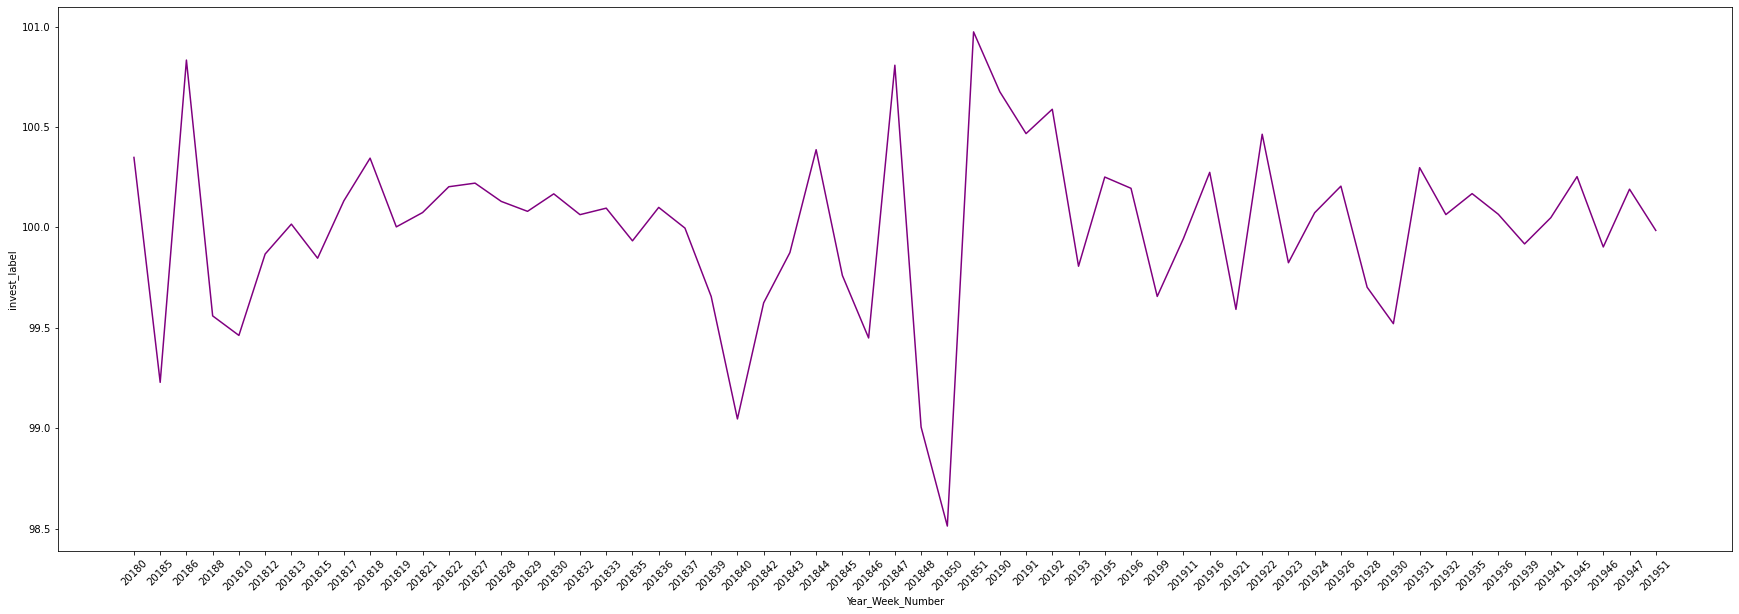

In [17]:
SPY_knn_pre = SPY_knn.copy()
SPY_knn_pre = SPY_knn_pre[SPY_knn_pre.Year >= 2018]
SPY_knn_pre = SPY_knn.copy()
SPY_knn_pre = SPY_knn_pre[SPY_knn_pre.Year >= 2018]
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=SPY_knn_pre_green,x='Year_Week_Number', y = "invest_label",color = 'purple')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

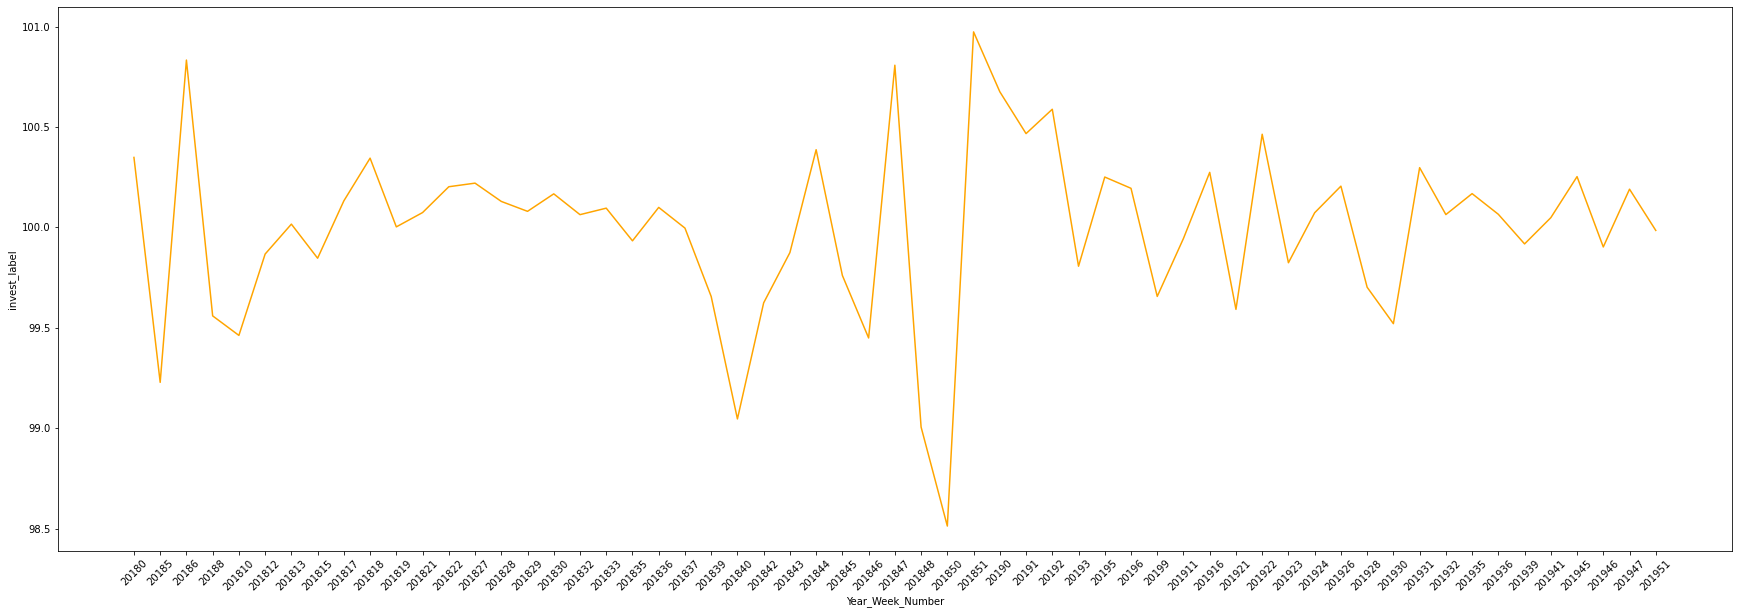

In [19]:
#p = 2
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=2, metric="minkowski")
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
SPY_knn_pre = SPY_knn.copy()
SPY_knn_pre = SPY_knn_pre[SPY_knn_pre.Year >= 2018]
SPY_knn_pre = SPY_knn.copy()
SPY_knn_pre = SPY_knn_pre[SPY_knn_pre.Year >= 2018]
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=SPY_knn_pre_green,x='Year_Week_Number', y = "invest_label",color = 'orange')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()